In [1]:
from bs4 import BeautifulSoup
import requests
import os
# https://data.binance.vision/?prefix=data/spot/monthly/klines/
# https://github.com/binance/binance-public-data

In [6]:
url = "https://data.binance.vision/?prefix=data/spot/monthly/klines/1INCHBTC/1m/"

with open("/home/ema/dev/shocks/data/binance_pairs.html") as file:
    soup = BeautifulSoup(file)

In [7]:
pairs = []
for pair in soup.find_all("a")[1: ]:
    pairs.append(pair.text.replace("/", ""))

def download_data(data_path, pair, months, freq="1m"):
    for month in months:
        pair_dir = os.path.join(DATA_PATH, pair)
        if not os.path.isdir(pair_dir):
            os.mkdir(pair_dir)

        url = f"https://data.binance.vision/data/spot/monthly/klines/{pair}/{freq}/{pair}-{freq}-{month}.zip"
        os.system(f" cd {pair_dir} && wget {url}")
 

In [44]:
months = [
    "2021-10",
    "2021-11",
    "2021-12",
    "2022-01",
    "2022-02",
    "2022-03",
]

freq = "1m"
DATA_PATH ="/home/ema/dev/shocks/shocks/data/binance/"
selected_pairs = ("BTCUSDT", "BNBBTC", "AVAXBTC", "JOEBTC", "AXSTRY", "CAKEBRL")


for pair in selected_pairs:
    download_data(data_path=DATA_PATH, pair=pair, months=months, freq="1m")

NameError: name 'download_data' is not defined

In [2]:
%load_ext autoreload
%autoreload 2

In [90]:
from shocks.dataset import Dataset
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (20,15)

data = Dataset(pair="AVAXBTC")
data.preprocess(freq="1h")

In [86]:
%%time
data.build_dataset()

done


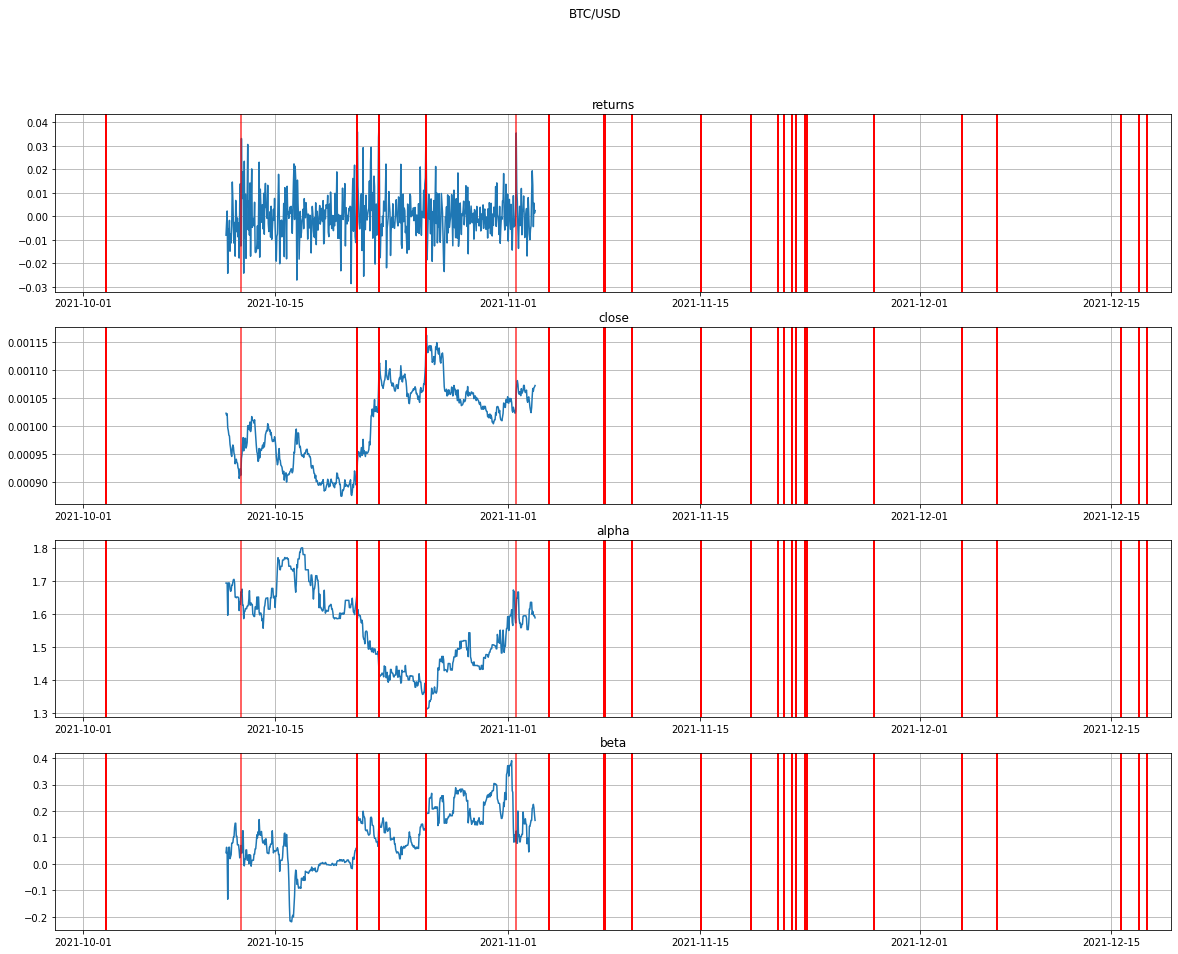

In [36]:
data.find_shocks(start_date="2021-10-01", end_date="2021-11-3", plot=False, std_from_mean=3.5)
data.fit(window=250, start_date="2021-10-01", end_date="2021-11-3")
data.plot_fit(data.fitted, data.shocks)

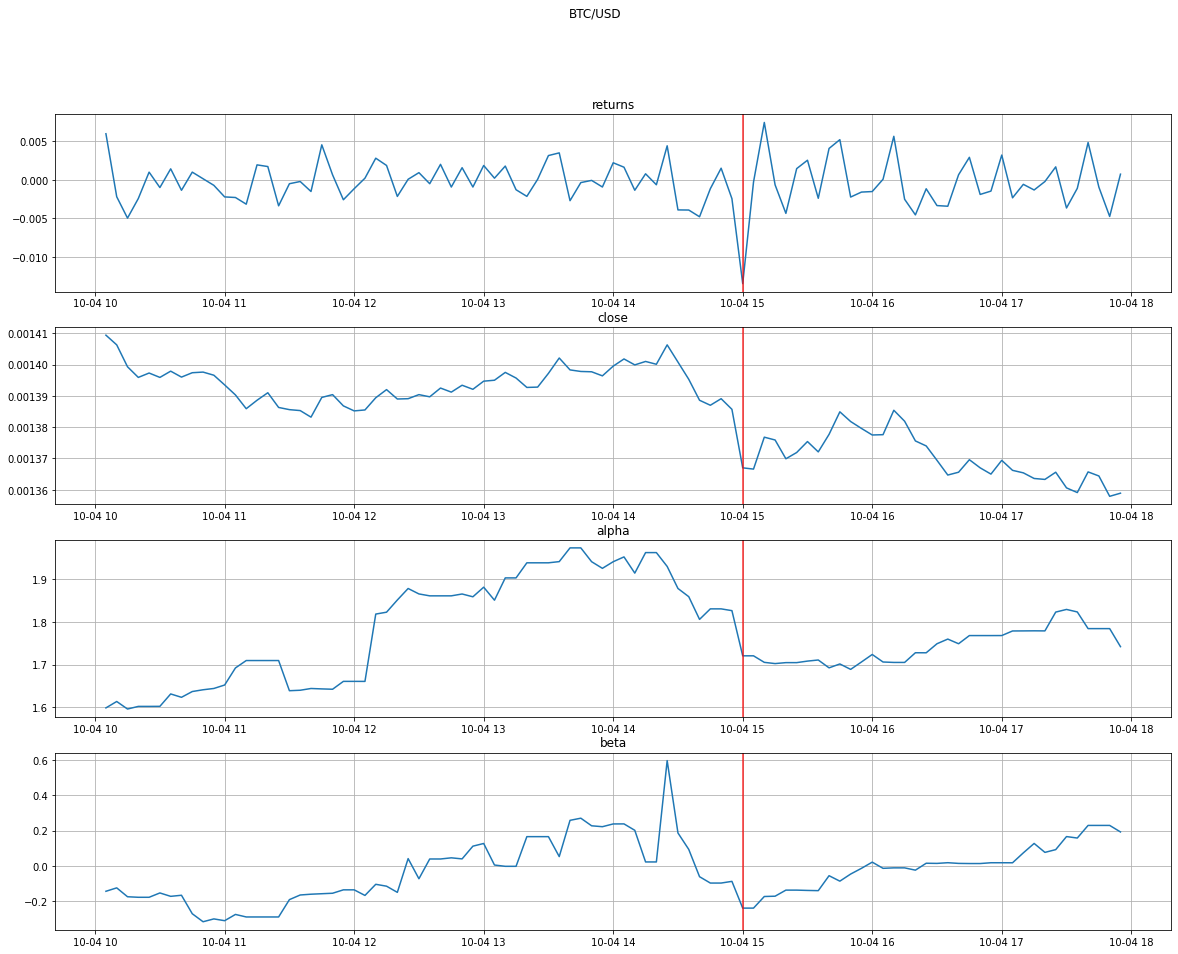

In [25]:
data.shocks[-1]
data.plot_fit(Dataset.filter_data(data.fitted, "2021-10-04 10:00:00", "2021-10-04 18:00:00"), [data.shocks[-1]])

In [27]:
(Dataset.filter_data(data.fitted, "2021-10-10 14:05:00", "2021-10-10 14:35:00")["alpha"].pct_change().mean(),
Dataset.filter_data(data.fitted, "2021-10-10 13:25:00", "2021-10-10 14:35:00")["alpha"].pct_change().mean(),
Dataset.filter_data(data.fitted, "2021-10-10 12:30:00", "2021-10-10 14:35:00")["alpha"].pct_change().mean(),
Dataset.filter_data(data.fitted, "2021-10-10 08:25:00", "2021-10-10 14:35:00")["alpha"].pct_change().mean(),
Dataset.filter_data(data.fitted, "2021-10-10 06:15:00", "2021-10-15 14:35:00")["alpha"].pct_change().mean()
)

(nan, nan, nan, nan, 0.0005102382129727523)

In [94]:
from pandas.core.accessor import CachedAccessor
CachedAccessor.

/home/ema/dev/shocks/shocks/dataset.py:48: UserWarning: registration of accessor <class 'shocks.dataset.TotPctChange'> under name 'tot_pct_change' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class TotPctChange:


pandas.core.accessor.CachedAccessor

In [89]:
import pickle
with open("./test.pkl", "rb") as f:
    d = pickle.load(f)

d["features"]

[{'alpha_5_mean': 1.4901576260925626},
 {'alpha_5_std': 0.007229245440041877},
 {'alpha_5_tot_pct_change': -0.012317291059795624},
 {'alpha_10_mean': 1.493789260472328},
 {'alpha_10_std': 0.010228668181493967},
 {'alpha_10_tot_pct_change': -0.02647251970351489},
 {'alpha_25_mean': 1.5178094802682351},
 {'alpha_25_std': 0.02994952884843245},
 {'alpha_25_tot_pct_change': -0.060318002616481486},
 {'alpha_50_mean': 1.5678399395324112},
 {'alpha_50_std': 0.057587572018116574},
 {'alpha_50_tot_pct_change': -0.0995196517830881},
 {'beta_5_mean': 0.11451182006858156},
 {'beta_5_std': 0.023641335906024442},
 {'beta_5_tot_pct_change': -0.350426541615102},
 {'beta_10_mean': 0.1337853513650812},
 {'beta_10_std': 0.03265335324898067},
 {'beta_10_tot_pct_change': -0.1663675434826642},
 {'beta_25_mean': 0.1394991525506323},
 {'beta_25_std': 0.03042513610897055},
 {'beta_25_tot_pct_change': -0.3810978028847292},
 {'beta_50_mean': 0.10090515505688998},
 {'beta_50_std': 0.06738839419023046},
 {'beta_50_

In [93]:
from shocks import from_root
from_root("data")

'/home/ema/dev/shocks/data'